In [174]:
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt
import requests
import pandas as pd

In [175]:
r = requests.get('https://www.nytimes.com/interactive/2017/06/23/opinion/trumps-lies.html')
soup = BeautifulSoup(r.text,'html.parser')
results= soup.find_all('span', attrs={'class':'short-desc'})

In [176]:
records = []
count=0
for result in results:
    count=count+1
    lie = result.contents[1][1:-2]
    sentiment=TextBlob(lie).sentiment.polarity
    records.append(( lie,sentiment))

In [177]:
df = pd.DataFrame(records, columns=['lie','sentiment'])

df.to_csv('trump_lies.csv', index=False, encoding='utf-8')

df = pd.read_csv('trump_lies.csv', encoding='utf-8')

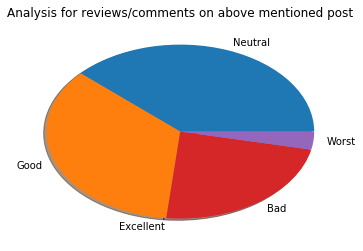

Total 180
neutral 69
good 63
excellent 0
bad 42
worst 6


In [178]:
neutral=0
good=0
excellent=0
bad=0
worst=0
a=df.iloc[:,1]



for i in range(0,count):
    b=a[i]
    if(b==0.0):
        neutral=neutral+1
    if((b<0) and(b>=(-0.5))):
        bad=bad+1
    if(b<(-0.5)):
        worst=worst+1
    if((b>0) and (b<=0.5)):
        good=good+1
    if(b>0.5):
        neutral=neutral+1
analysis=[neutral,good,excellent,bad,worst]
plt.pie(analysis,labels=['Neutral','Good','Excellent','Bad','Worst'],shadow= True)
plt.title("Analysis for reviews/comments on above mentioned post")
plt.show() 
print('Total',count)
print('neutral',neutral)
print('good',good)
print('excellent',excellent)
print('bad',bad)
print('worst',worst)